In [1]:
#import moudules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import cv2
import h5py

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [16]:
fpath = './data/train'

label = []
data = []
count = 0
length = len(os.listdir(fpath))

fpath = "./data/train"
for file in os.listdir(fpath):
    
    #read image
    image = cv2.imread(os.path.join(fpath,file))
    image = cv2.resize(image,(96,96))
    
    #append image to data
    data.append(image/255)
    
    #label "dog" as 1 and "cat" as 0
    if file.startswith("dog"):
        label.append(1)
    else:
        label.append(0)
    
    count += 1
    if count%(length/20) == 0:
        print(count, " image data retreived (", round(count/length*100,2), "% done )")
        
print('complete!!')
    
    
 

1250  image data retreived ( 5.0 % done )
2500  image data retreived ( 10.0 % done )
3750  image data retreived ( 15.0 % done )
5000  image data retreived ( 20.0 % done )
6250  image data retreived ( 25.0 % done )
7500  image data retreived ( 30.0 % done )
8750  image data retreived ( 35.0 % done )
10000  image data retreived ( 40.0 % done )
11250  image data retreived ( 45.0 % done )
12500  image data retreived ( 50.0 % done )
13750  image data retreived ( 55.0 % done )
15000  image data retreived ( 60.0 % done )
16250  image data retreived ( 65.0 % done )
17500  image data retreived ( 70.0 % done )
18750  image data retreived ( 75.0 % done )
20000  image data retreived ( 80.0 % done )
21250  image data retreived ( 85.0 % done )
22500  image data retreived ( 90.0 % done )
23750  image data retreived ( 95.0 % done )
25000  image data retreived ( 100.0 % done )
complete!!


In [27]:
savepath = './data/save_train'
os.path.join(savepath , 'label')

import csv


#Assuming res is a flat list
with open(os.path.join(savepath, 'label.csv'), "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in label:
        writer.writerow([val])   

#Assuming res is a flat list
with open(os.path.join(savepath , 'data.csv'), "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    count = 0
    length = len(data)
    for val in data:
        writer.writerow([val])
        count +=1
        if count%(length/20) == 0:
            print(count, " lines saved (", round(count/length*100,2), "% done )")
        

1250  lines saved ( 5.0 % done )
2500  lines saved ( 10.0 % done )
3750  lines saved ( 15.0 % done )
5000  lines saved ( 20.0 % done )
6250  lines saved ( 25.0 % done )
7500  lines saved ( 30.0 % done )
8750  lines saved ( 35.0 % done )
10000  lines saved ( 40.0 % done )
11250  lines saved ( 45.0 % done )
12500  lines saved ( 50.0 % done )
13750  lines saved ( 55.0 % done )
15000  lines saved ( 60.0 % done )
16250  lines saved ( 65.0 % done )
17500  lines saved ( 70.0 % done )
18750  lines saved ( 75.0 % done )
20000  lines saved ( 80.0 % done )
21250  lines saved ( 85.0 % done )
22500  lines saved ( 90.0 % done )
23750  lines saved ( 95.0 % done )
25000  lines saved ( 100.0 % done )


input index :  1


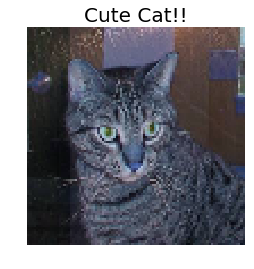

In [19]:
input_index = input("input index : ")
input_index = int(input_index)

pixels = data[input_index]

if label[input_index] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [31]:
model = Sequential()
model.add(Conv2D(filters=3,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(filters=20, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=3,kernel_size=(3,3),padding = 'same', activation="relu"))
model.add(Conv2D(filters=5, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=10, kernel_size=(5,5),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(5,5),padding = 'same',activation="relu"))
model.add(Conv2D(filters=5, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 3)         84        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 3)         543       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 5)         140       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 10)        1260      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 10)        0         
__________

In [29]:
data1 = np.array(data)
data1 = data1.reshape((data1.shape)[0],(data1.shape)[1],(data1.shape)[2],3)
label=np.array(label)

In [30]:
print (data1.shape)
print (label.shape)

(25000, 96, 96, 3)
(25000,)


In [62]:
model.fit(data1,label,validation_split=0.25,epochs=4,batch_size=10)
model.save_weights("model.h5")

Train on 18750 samples, validate on 6250 samples
Epoch 1/4
18750/18750 [==============================] - 464s 25ms/step - loss: 0.5446 - acc: 0.7291 - val_loss: 0.8107 - val_acc: 0.5342
Epoch 2/4
18750/18750 [==============================] - 566s 30ms/step - loss: 0.5083 - acc: 0.7527 - val_loss: 0.7436 - val_acc: 0.5790
Epoch 3/4
18750/18750 [==============================] - 447s 24ms/step - loss: 0.4776 - acc: 0.7735 - val_loss: 0.8290 - val_acc: 0.5619
Epoch 4/4
18750/18750 [==============================] - 449s 24ms/step - loss: 0.4569 - acc: 0.7877 - val_loss: 0.8535 - val_acc: 0.5509


In [12]:
tfpath = "./data/test2"
tlength = len(os.listdir(tfpath))
test_data=[]
id=[]
count=0
for file in os.listdir(tfpath):
    image_data=cv2.imread(os.path.join(tfpath,file))
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if count%(tlength/20) == 0:
        print(count, " image data retreived (", round(count/tlength*100,2), "% done )")
        
print('complete!!')

0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
0  image data retreived ( 0.0 % done )
complete!!


In [16]:
test_data1=np.array(test_data)
print (test_data1.shape)
test_data1=test_data1.reshape((test_data1.shape)[0],(test_data1.shape)[1],(test_data1.shape)[2],3)

(8, 96, 96, 3)


In [18]:
model = Sequential()
model.add(Conv2D(filters=3,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(filters=20, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=3,kernel_size=(3,3),padding = 'same', activation="relu"))
model.add(Conv2D(filters=5, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=10, kernel_size=(5,5),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(5,5),padding = 'same',activation="relu"))
model.add(Conv2D(filters=5, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 3)         84        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 20)        560       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 3)         543       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 5)         140       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 10)        1260      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 10)        0         
__________

In [19]:
model

In [20]:
# 2. 모델 불러오기
from keras.models import load_model
model.load_weights("model.h5")

prediction :  7


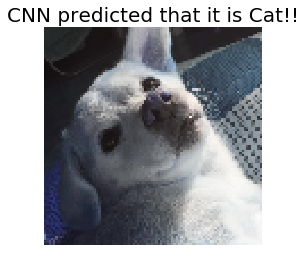

In [80]:
input_index = input("prediction : ")
input_index = int(input_index)

pixels = test_data1[input_index]

if labels[input_index] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('CNN predicted that it is ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [8]:
answer = [0,1,1,1,0,0,0,1]

In [21]:
model

In [22]:
predicted_labels=model.predict(test_data1)
predicted_labels=np.round(predicted_labels,decimals=2)
labels=[1 if value>0.5 else 0 for value in predicted_labels]
labels

[0, 0, 1, 1, 0, 0, 0, 0]

In [23]:
right = []
for i in range(len(labels)):
    right.append(labels[i]==answer[i])
sum(right)/len(right)
    

0.75

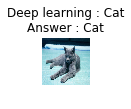

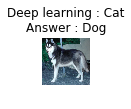

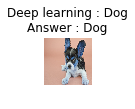

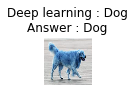

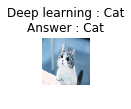

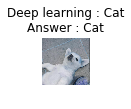

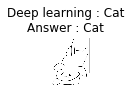

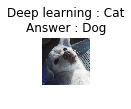

In [33]:
for input_index in range(0,8):
    pixels = test_data1[input_index]
    
    if labels[input_index] == 1:
        specie = "Dog"
    else:
        specie = "Cat"
    if answer[input_index] == 1:
        specieA = "Dog"
    else:
        specieA = "Cat"
    i = input_index + 1
    plt.subplot(4,2,i)    
    plt.title('Deep learning : ' + specie +  '\nAnswer : ' + specieA)
    plt.imshow(pixels)
    plt.axis('off')
    plt.show()

In [ ]:
1+1

In [ ]:
tfpath = "./data/test1"
tlength = len(os.listdir(tfpath))
test_data=[]
id=[]
counter=0
for file in os.listdir(tfpath):
    image_data=cv2.imread(os.path.join(tfpath,file))
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if count%(tlength/20) == 0:
        print(count, " image data retreived (", round(count/length*100,2), "% done )")
        
print('complete!!')

In [ ]:
from PIL import Image
im = Image.open("1.jpg")
nx, ny = im.size
im2 = im.resize((int(nx*1.5), int(ny*1.5)), Image.BICUBIC)
im2.save("2.png")

In [ ]:
tfpath2 = "./data/test2"
tlength2 = len(os.listdir(tfpath2))
test_data2=[]
id2=[]
count=0
for file in os.listdir(tfpath2):
    image_data=cv2.imread(os.path.join(tfpath2,file))
    try:
        image_data2=cv2.resize(image_data2,(96,96))
        test_data2.append(image_data2/255)
        id2.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if count%(tlength/20) == 0:
        print(count, " image data retreived (", round(count/length*100,2), "% done )")
        
print('complete!!')